<a href="https://colab.research.google.com/github/20KMJ/ESAA7/blob/main/MiniProjectFinal_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**

In [ ]:
# matplotlib 한글 깨짐방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지 (폰트 지정)

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 로컬에서 드라이브에서 데이터 파일 업로드하기
# 데이터 불러오기
train=pd.read_csv("/content/movies_train.csv")

# **2. 탐색적 자료 분석(EDA)**

# 데이터 전처리

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])

# 데이터 시각화 및 분석

## 1-1) 장르별 관객 수 분석

### 변수 살펴보기

In [ ]:
# 장르 종류
train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [ ]:
# 장르별 개봉한 영화 개수
train.groupby('genre')['genre'].count().sort_values(ascending=False)

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
# 상위 관객수 10개의 장르(흥행 영화 순위)
train.sort_values(by='box_off_num', ascending=False)[['genre','box_off_num']].head(10)

,genre,box_off_num
372,드라마,14262766
362,느와르,12983841
530,코미디,12811435
498,액션,12706663
460,드라마,12323595
122,드라마,11374879
496,SF,9350351
101,드라마,9135806
505,SF,8666208
476,코미디,8659725


In [ ]:
# 하위 관객수 10개의 장르
train.sort_values(by='box_off_num')[['genre', 'box_off_num']].tail(10)

,genre,box_off_num
476,코미디,8659725
505,SF,8666208
101,드라마,9135806
496,SF,9350351
122,드라마,11374879
460,드라마,12323595
498,액션,12706663
530,코미디,12811435
362,느와르,12983841
372,드라마,14262766


### 시각화

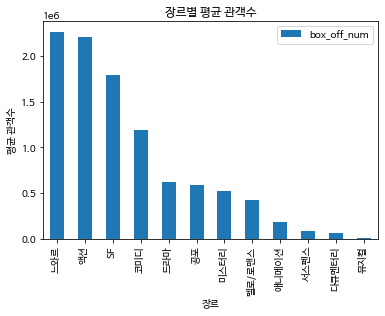

In [ ]:
# 장르별 평균 관객수
TotalByGenre = train[['genre', 'box_off_num']].groupby('genre').mean().sort_values(by='box_off_num', ascending=False)
TotalByGenre.plot(kind='bar')

plt.title("장르별 평균 관객수")
plt.xlabel("장르")
plt.ylabel("평균 관객수")
plt.show()

### 분석

* 당시 개봉한 영화 중 **드라마** 장르가 가장 많았고 상위 관객수 10개의 장르(즉, 흥행 영화 순위)를 확인해본 결과 역시 **드라마** 장르의 비중이 높았다. 하지만 드라마 장르의 **평균 관객수**는 많지 않은 것을 확인할 수 있다.
* 당시 드라마 장르가 흥행함에 따라 많은 드라마 장르의 영화가 개봉하였던 것으로 보인다. 하지만 개봉한 영화가 많은 만큼 흥행에 실패한 영화 또한 많았을 것이다. 실제로 하위 관객수 10개의 장르를 확인해본 결과에서도 드라마 장르의 비중이 높게 나타난 것을 확인할 수 있다. 성적이 저조했던 많은 드라마 장르의 영화가 반영된 결과, 그래프에 상에서는 드라마 장르의 평균 관객수가 낮게 나온 것으로 생각된다.

## 1-2) 장르별 스텝 수 분석

### 변수 살펴보기

In [ ]:
# 상위 스텝수 10개의 장르
train.sort_values(by='num_staff', ascending=False)[['genre','num_staff']].head(10)

,genre,num_staff
372,드라마,869
505,SF,868
201,액션,719
320,액션,687
477,느와르,683
124,드라마,650
310,드라마,642
498,액션,628
487,드라마,612
48,액션,600


In [ ]:
# 하위 스텝수 10개의 장르
train.sort_values(by='num_staff')[['genre', 'box_off_num']].tail(10)

,genre,box_off_num
48,액션,1177435
487,드라마,1762733
498,액션,12706663
310,드라마,470308
124,드라마,3849696
477,느와르,2260512
320,액션,7482180
201,액션,2192276
505,SF,8666208
372,드라마,14262766


### 시각화

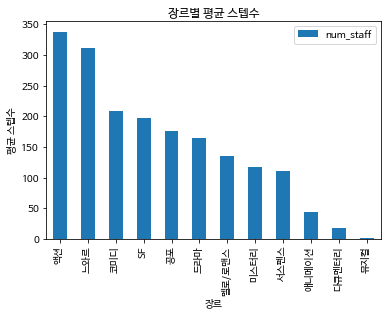

In [ ]:
# 장르별 평균 스텝수
TotalByGenre = train[['genre', 'num_staff']].groupby('genre').mean().sort_values(by='num_staff', ascending=False)
TotalByGenre.plot(kind='bar')

plt.title("장르별 평균 스텝수")
plt.xlabel("장르")
plt.ylabel("평균 스텝수")
plt.show()

### 분석

* 지금까지 역대 영화 제작비 순위에 있는 영화를 조사해본 결과 다음과 같다.  
캐리비안의 해적 **(장르: 액션)**  
어벤져스 **(장르: 액션/SF)**  
저스티스 리그 **(장르: 액션/SF)**  
스타워즈 **(장르: 액션/SF)**

* 이에 따라, 액션, SF 장르 등이 제작비가 많이 들것이라 추측했고, 많은 제작비가 들어갈수록 영화 제작에 필요한 스텝수도 많을 것이라 예상했다. 그래프를 살펴보면 예상했던 것처럼 **액션** 영화의 평균 스텝수가 가장 많은 것을 확인할 수 있다. **SF** 장르도 상위에 있는 것을 확인할 수 있다.
* 예상 외로, **코미디** 장르에 평균 스텝수가 높게 나타났다. 위에 1-1) 장르별 관객 수 분석 부분에서 당시 코미디 영화가 대세였을 것이라고 추측했는데, 영화 흥행에 제작비가 미치는 영향이 크기 때문에 대세인 코미디 영화에 많은 인력을 들인 것으로 예상된다.


## 1-3) 장르별 상영등급

### 변수 살펴보기

In [ ]:
# 상영등급
train['screening_rat'].unique()

array(['청소년 관람불가', '15세 관람가', '전체 관람가', '12세 관람가'], dtype=object)

### 시각화

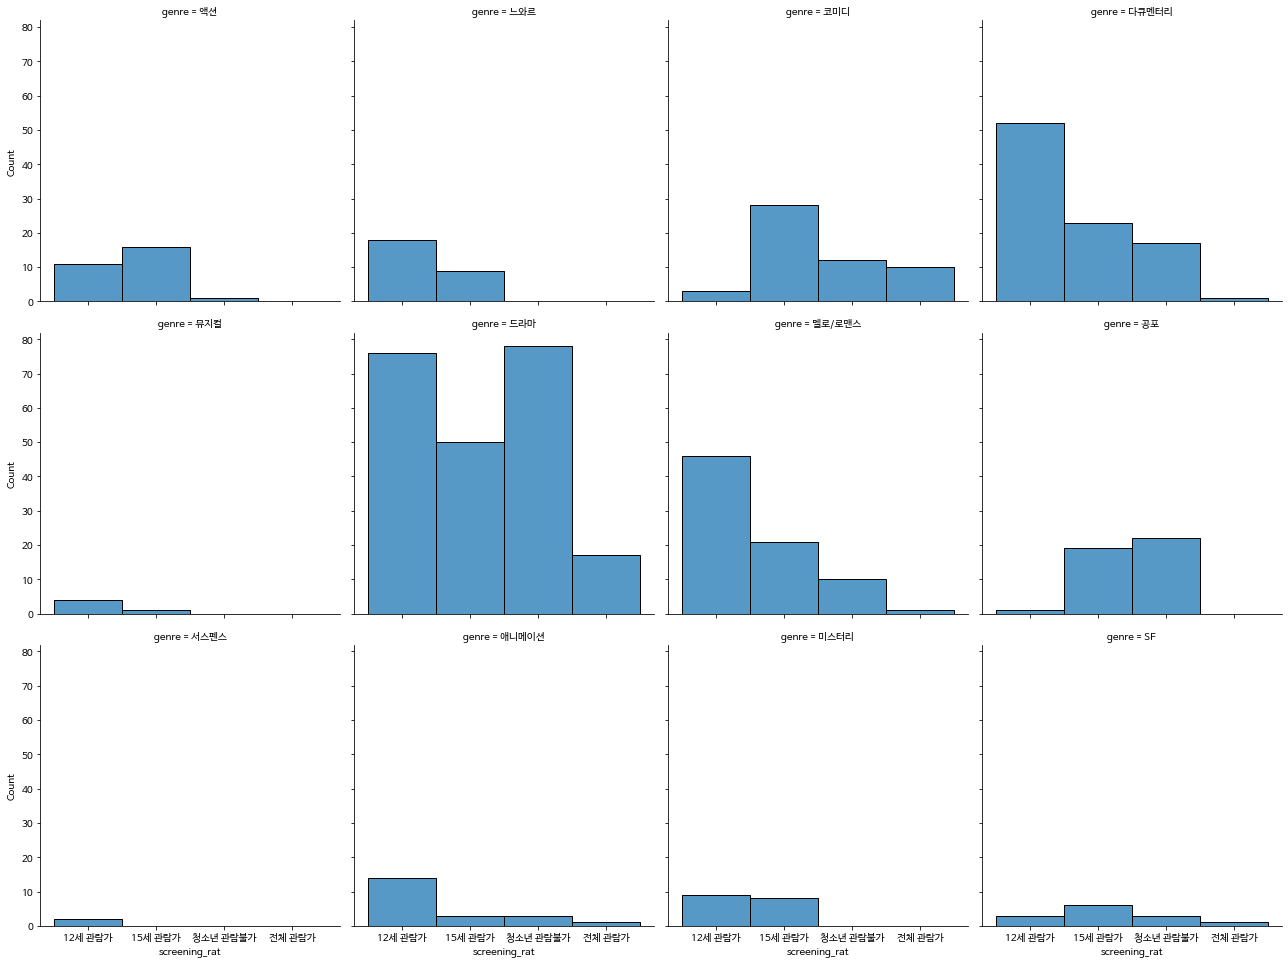

In [ ]:
facet = sns.FacetGrid(train, col='genre', col_wrap=4, height=4.5)
facet.map(sns.histplot, 'screening_rat')

### 분석

* *느와르, 다큐멘터리, 뮤지컬, 멜로/로맨스, 서스펜스, 애니메이션, 미스테리* 장르는 **12세 관람가**가 가장 많았다.
* *액션, 코미디, SF* 장르는 **15세 관람가**가 가장 많았다.
* *드라마, 공포* 장르는 **청소년 관람불가**가 가장 많았다.
* **전체 관람가**의 비중이 가장 높은 장르는 하나도 없다.
* **공포**영화는 청소년 관람불가의 비중이 가장 높을거라 예상했는데 예상과 동일한 결과 나왔다.
* **애니메이션** 영화는 전체관람가의 비중이 가장 높을거라 예상했는데 오히려 전체 관람가의 비중이 가장 적었다.